# Практическая работа №1: Алгоритмы эффиктивного вычисления одночленов

Выполнил студент гр. 1303 Депрейс Александр. Вариант №7.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за
минимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

Введем некоторые понятия:
1. $\lambda(n) = \lfloor \log_2(n) \rfloor$ - уменьшенная на еденицу длина бинарной записи числа $n$.
2. $\upsilon(n)$ - вес Хэмминга для бинарной записи числа $n$. (Число ненулевых цифр в записи числа $n$)

### Бинарный метод $ SX $
Алгоритм возведения числа в степень $ n $:

1. Записываем натуральное число $ n $ в бинарном виде: $ n = (a_m,a_{m-1}...a_2,a_1)_{2} $, $ a_m = 1 $
2. Отбрасываем старший бит: $ (a_{m-1},a_{m-2}\dots a_2,a_1)_{2} $
3. Делаем замену по следущему правилу:
$ a_i = 1 \Rightarrow a_i = SX\\
a_i = 0 \Rightarrow a_i = S$
и получим строку из элементов $S$ и $X$
4. Выполняем вычисление, где $S$ - возведение в квадрат, а $X$ - умножение на $x$.

Число операций для бинарного метода $SX$: $\lambda(n) + \upsilon(n) - 1$

### Бинарный метод возведения в степень справа налево
Алгоритм возведения числа в степень $ n $:

1. Положим $N = n, Y = 1, Z = x$
2. Если $N$ - четное, то $N = \lfloor\frac{N}{2}\rfloor$, переходим к шагу 4.<br>
Если $N$ - нечетное, то $N = \lfloor\frac{N}{2}\rfloor$, $Y = Z \cdot Y$, переходим к шагу 3
3. Если $N == 0$, то возвращаем $Y$.<br>
Если $N != 0$, то переходим к шагу 4
4. $Z = Z\cdot Z$, переходим к шагу 2

Число операций для бинарного метода справа налево: $\lambda(n) + \upsilon(n)$

### Метод множителей
Метод множителей основан на разложении $n$:

1. Представим $n = pq$, где $p$ - наименьший простой множитель $n$, $q > 1$. Таким образом $x^{n}$ можно найти вычислив $x^{p}$ и возведя эту величину в степень $q$.
2. Если $n$ - простое, то можно сначала вычислить $x^{n - 1}$, а потом умножить его на $x$.
3. При $n = 1$ получаем $x^{n}$ без вычислений.


### Дерево степеней
Алгоритм построения $k + 1$ уровня дерева степеней:
1. Пусть построен $k$-ый уровень дерева. Необходимо постороить $k + 1$ уровень.
2. Берем каждый узел $n$ на $k$-ом уровне слева направо и присоединяем к нему снизу узлы: $n + a_0,n+a_1,\dots ,n+a_{k-1} = 2n$.
3. Здесь важен порядок присоединения, $a_0 = 1$.
4. Если какой-то узел уже появлялся раньше в дереве, то он устраняется.

## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1) Бинарный метод $SX$
Реализуем функцию SX_repr, которая представляет степень числа $n$ в нотации $SX$:

In [1]:
def SX_repr(n):
    sx_string = str(bin(n)[3:])
    sx_string = sx_string.replace('0','S').replace('1','SX')
    return sx_string
SX_repr(10)

'SSXS'

Реализуем функцию SX_method, которая возводит &x& в степень $n$ с помощью бинарного метода $SX$, выводя последовательность выполненных операций. 

In [2]:
def SX_method(n):
    var('x')
    number = x
    steps = 0
    seq = SX_repr(n)
    result_str = 'SX Sequence: ' + seq + '   Steps: x'
    for action in seq:
        if action == 'X':
            number = number * x
            result_str += '--' + str(number)
            steps += 1
            continue
        number = number * number
        result_str += '--' + str(number)
        steps += 1
    result_str += '  Steps quantity: ' + str(steps)
    print(result_str)

Протестируем бинарный метод $SX$ для различных $n$:

In [3]:
test_numbers = [10, 27, 31, 43]
for elem in test_numbers:
    SX_method(elem)

SX Sequence: SSXS   Steps: x--x^2--x^4--x^5--x^10  Steps quantity: 4
SX Sequence: SXSSXSX   Steps: x--x^2--x^3--x^6--x^12--x^13--x^26--x^27  Steps quantity: 7
SX Sequence: SXSXSXSX   Steps: x--x^2--x^3--x^6--x^7--x^14--x^15--x^30--x^31  Steps quantity: 8
SX Sequence: SSXSSXSX   Steps: x--x^2--x^4--x^5--x^10--x^20--x^21--x^42--x^43  Steps quantity: 8


Проверим то, что число операций для бинарного метода $SX$ равно $\lambda(n) + \upsilon(n) - 1$:<br>
$10) \, \lambda(10) + \upsilon(10) - 1 = 3 + 2 - 1 = 4$<br>
$27) \,\lambda(27) + \upsilon(27) - 1 = 4 + 4 - 1 = 7$<br>
$31) \,\lambda(31) + \upsilon(31) - 1 = 4 + 5 - 1 = 8$<br>
$43) \,\lambda(43) + \upsilon(43) - 1 = 5 + 4 - 1 = 8$<br>
Все верно!

### Вывод по бинарному методу $SX$
Реализована функция приводящая число n в нотацию $SX$, также реализована функция, выполняющая возведение числа в степень в соответствии с методом, результаты полученные на практике совпадают с теоритическими.

### 2) Бинарный метод возведения в степень справа налево
Реализуем функцию R_to_L_method, которая возводит &x& в степень $n$ с помощью бинарного метода возведения в степень справа налево, выводя промежуточные данные:

In [4]:
def R_to_L_method(n):
    N = n
    Y = 1
    Z = x
    iteration = 0
    steps = 0
    while True:
        iteration += 1
        if N % 2:
            Y = Z * Y
            steps += 1
        N = N // 2
        if N == 0:
            print('Iteration {}) N:{}  Y:{}  Z:{}  Steps quantity:{}'.format(iteration, N, Y, Z, steps))
            return Y
        Z *= Z
        steps += 1
        print('Iteration {}) N:{}  Y:{}  Z:{}  Steps quantity:{}'.format(iteration, N, Y, Z, steps))

Приведем пример работы функции на тестовом массиве чисел:

In [5]:
for elem in test_numbers:
    print('Degree) {}'.format(elem))
    R_to_L_method(elem)
    print()

Degree) 10
Iteration 1) N:5  Y:1  Z:x^2  Steps quantity:1
Iteration 2) N:2  Y:x^2  Z:x^4  Steps quantity:3
Iteration 3) N:1  Y:x^2  Z:x^8  Steps quantity:4
Iteration 4) N:0  Y:x^10  Z:x^8  Steps quantity:5

Degree) 27
Iteration 1) N:13  Y:x  Z:x^2  Steps quantity:2
Iteration 2) N:6  Y:x^3  Z:x^4  Steps quantity:4
Iteration 3) N:3  Y:x^3  Z:x^8  Steps quantity:5
Iteration 4) N:1  Y:x^11  Z:x^16  Steps quantity:7
Iteration 5) N:0  Y:x^27  Z:x^16  Steps quantity:8

Degree) 31
Iteration 1) N:15  Y:x  Z:x^2  Steps quantity:2
Iteration 2) N:7  Y:x^3  Z:x^4  Steps quantity:4
Iteration 3) N:3  Y:x^7  Z:x^8  Steps quantity:6
Iteration 4) N:1  Y:x^15  Z:x^16  Steps quantity:8
Iteration 5) N:0  Y:x^31  Z:x^16  Steps quantity:9

Degree) 43
Iteration 1) N:21  Y:x  Z:x^2  Steps quantity:2
Iteration 2) N:10  Y:x^3  Z:x^4  Steps quantity:4
Iteration 3) N:5  Y:x^3  Z:x^8  Steps quantity:5
Iteration 4) N:2  Y:x^11  Z:x^16  Steps quantity:7
Iteration 5) N:1  Y:x^11  Z:x^32  Steps quantity:8
Iteration 6) 

Для $n = 10$

| № Итерации | Значение N | Значение Y | Значение Z |
|------------|------------|------------|------------|
| 0          | 10         | 1          | $x$        |
| 1          | 5          | 1          | $x^{2}$    |
| 2          | 2          | $x^{2}$    | $x^{4}$    |
| 3          | 1          | $x^{2}$    | $x^{8}$    |
| 4          | 0          | $x^{10}$   | $x^{8}$    |

Для $n = 27$

| № Итерации | Значение N | Значение Y | Значение Z |
|------------|------------|------------|------------|
| 0          | 27         | 1          | $x$        |
| 1          | 13         | $x$        | $x^{2}$    |
| 2          | 6          | $x^{3}$    | $x^{4}$    |
| 3          | 3          | $x^{3}$    | $x^{8}$    |
| 4          | 1          | $x^{11}$   | $x^{16}$   |
| 5          | 0          | $x^{27}$   | $x^{16}$   |

Для $n = 31$

| № Итерации | Значение N | Значение Y | Значение Z |
|------------|------------|------------|------------|
| 0          | 31         | 1          | $x$        |
| 1          | 15         | $x$        | $x^{2}$    |
| 2          | 7          | $x^{3}$    | $x^{4}$    |
| 3          | 3          | $x^{7}$    | $x^{8}$    |
| 4          | 1          | $x^{15}$   | $x^{16}$   |
| 5          | 0          | $x^{31}$   | $x^{16}$   |

Для $n = 43$

| № Итерации | Значение N | Значение Y | Значение Z |
|------------|------------|------------|------------|
| 0          | 43         | 1          | $x$        |
| 1          | 21         | $x$        | $x^{2}$    |
| 2          | 10         | $x^{3}$    | $x^{4}$    |
| 3          | 5          | $x^{3}$    | $x^{8}$    |
| 4          | 2          | $x^{11}$   | $x^{16}$   |
| 5          | 1          | $x^{11}$   | $x^{32}$   |
| 6          | 0          | $x^{43}$   | $x^{32}$   |

Проверим то, что число операций для бинарного метода возведения в степень справа налево равно $\lambda(n) + \upsilon(n)$:<br>
$10) \, \lambda(10) + \upsilon(10) = 3 + 2 = 5$<br>
$27) \,\lambda(27) + \upsilon(27) = 4 + 4 = 8$<br>
$31) \,\lambda(31) + \upsilon(31) = 4 + 5 = 9$<br>
$43) \,\lambda(43) + \upsilon(43) = 5 + 4 = 9$<br>
Все верно!

### Вывод по бинарному методу возведения в степень справа налево
Реализована функция выполняющая возведение числа в степень в соответствии с методом, результаты полученные на практике совпадают с теоритическими.

В общем случае значение $Z$ после завершения алгоритма равно $x^{k - 1}$, где $k$ - количество итераций при выполнении возведения в степень.

### 3) Сравним бинарный метод $SX$ и метод возведения в степень справа налево. 
Для бинарного метода $SX$ требуется $\lambda(n) + \upsilon(n) - 1$ операций умножения, как и было доказано на практике, а бинарный метод возведения справа налево требует $\lambda(n) + \upsilon(n)$ операций умножения.

Следовательно бинарный метод $SX$ на одну операцию лучше чем метод возведения в степень справа налево.

### 4) Метод множителей. 
Для ранее приведённых $n$ вручную выполним метод множителей:


1. $n = 10 = 2 \cdot 5$, где $p = 2, q = 5$<br>
    Вычислим $y = x^{p}: x \Rightarrow x^{2}$, итого 1 операция<br>
    Вычислим $y^{q}: y \Rightarrow y^{2} \Rightarrow y^{4} \Rightarrow y^{5}$, итого 3 операции<br>
    В сумме получается 4 операции.
    

2. $n = 27 = 3 \cdot 9$, где $p = 3, q = 9$<br>
    Вычислим $y = x^{p}: x \Rightarrow x^{2} \Rightarrow x^{3}$, итого 2 операции<br>
    Вычислим $y^{q}: y \Rightarrow y^{2} \Rightarrow y^{4} \Rightarrow y^{8} \Rightarrow y^{9}$, итого 4 операции<br>
    В сумме получается 6 операций.
    

3. $n = 31$, $n$ - простое, $n = n_{1} + 1$, $n_{1} = 2 \cdot 15$, где $p = 2, q = 15$<br>
    Вычислим $y = x^{p}: x \Rightarrow x^{2}$, итого 1 операция<br>
    Вычислим $y^{q}: y \Rightarrow y^{2} \Rightarrow y^{3} \Rightarrow y^{6} \Rightarrow y^{7} \Rightarrow y^{14} \Rightarrow y^{15}$, итого 6 операций<br>
    Затем $x^{30} \Rightarrow x^{31}$, итого 1 операций<br>
    В сумме получается 8 операций.


4. $n = 43$, $n$ - простое, $n = n_{1} + 1$, $n_{1} = 2 \cdot 21$, где $p = 2, q = 21$<br>
    Вычислим $y = x^{p}: x \Rightarrow x^{2}$, итого 1 операция<br>
    Вычислим $y^{q}: y \Rightarrow y^{2} \Rightarrow y^{4} \Rightarrow y^{5} \Rightarrow y^{10} \Rightarrow y^{20} \Rightarrow y^{21}$, итого 6 операций<br>
    Затем $x^{42} \Rightarrow x^{43}$, итого 1 операций<br>
    В сумме получается 8 операций.
    

Данный алгоритм выполняет возведение в степень за идентичное или меньшее количесво итераций чем бинарный метод $SX$, из этого можно было бы сделать вывод, что метод множителей лучше чем бинарный метод $SX$, но существуют $n$, для которых количество итераций больше чему у рассмотренных ранее методов. Приведем такой пример:

In [6]:
SX_method(33)

SX Sequence: SSSSSX   Steps: x--x^2--x^4--x^8--x^16--x^32--x^33  Steps quantity: 6


$n = 33 = 3 \cdot 11$, где $p = 3, q = 11$<br>
    Вычислим $y = x^{p}: x \Rightarrow x^{2} \Rightarrow x^{3}$, итого 2 операции<br>
    Вычислим $y^{q}: y \Rightarrow y^{2} \Rightarrow y^{4} \Rightarrow y^{5} \Rightarrow y^{10} \Rightarrow y^{11}$, итого 5 операций<br>
    В сумме получается 7 операций.
    
### Вывод по методу множителей
Метод множителей в некоторых случаях, когда бинарная запись числа $n$ представляет собой большое количество едениц, и не такое большое количество нулей, бывает лучше чем бинарный метод $SX$, но если бинарная запись числа $n$ сильно разряжена, то разумнее использовать бинарный метод $SX$.

### 5) Дерево степеней.
Реализуем функцию build_tree, которая будет строить дерево степеней в виде словаря до заданного уровня k.

In [7]:
def build_tree(k):
    tree_dict = {1:[0]}
    elems_on_lst = [1]
    for level in range(k):
        new_elems_on_lst = []
        for item in elems_on_lst:
            parent = item
            while parent != 0:
                if parent + item not in tree_dict:
                    new_elems_on_lst.append(parent + item)
                    tree_dict[parent+item] = [item]
                parent = tree_dict[parent][0]
        elems_on_lst = new_elems_on_lst
        elems_on_lst.sort()
    tree_dict.pop(1)
    return tree_dict

In [8]:
build_tree(6)

{2: [1],
 4: [2],
 3: [2],
 6: [3],
 5: [3],
 8: [4],
 10: [5],
 7: [5],
 12: [6],
 9: [6],
 16: [8],
 14: [7],
 18: [9],
 15: [9],
 11: [9],
 20: [10],
 13: [10],
 24: [12],
 32: [16],
 17: [16],
 22: [11],
 26: [13],
 23: [13],
 28: [14],
 21: [14],
 19: [14],
 30: [15],
 34: [17],
 33: [17],
 25: [17],
 36: [18],
 27: [18],
 40: [20],
 48: [24],
 64: [32]}

Реализуем функцию path_in_tree, которая будет рисовать дерево степеней и окрашивать путь от вершины дерева до заданного числа $n$. 

In [9]:
def path_in_tree(tree,n):
    G = Graph(tree)
    red_dict = [1]
    while n != 1:
        red_dict.append(n)
        n = tree[n][0]
    G = G.plot(layout = 'tree', tree_root = 1, vertex_colors = {'red':red_dict})
    G.show()

Проверим метод дерева степеней на тестовом массиве чисел, сравним этот метод со всеми предыдущими:

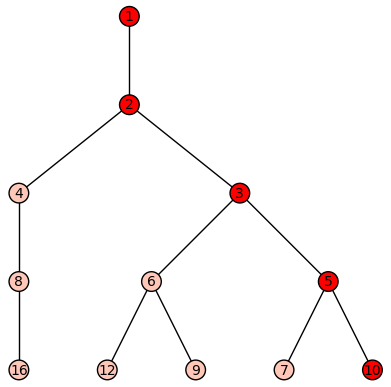

In [10]:
path_in_tree(build_tree(4),10)

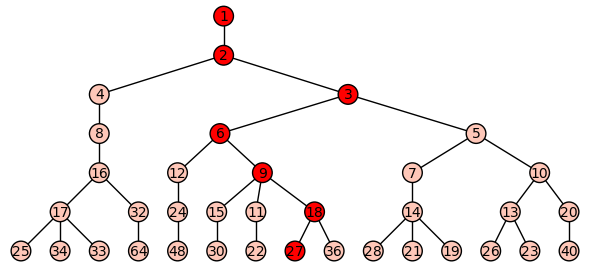

In [11]:
path_in_tree(build_tree(6),27)

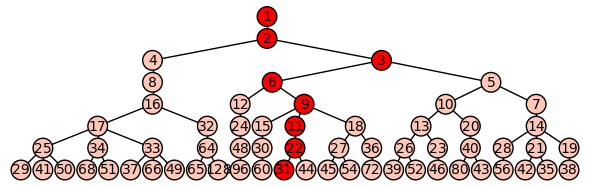

In [12]:
path_in_tree(build_tree(7),31)

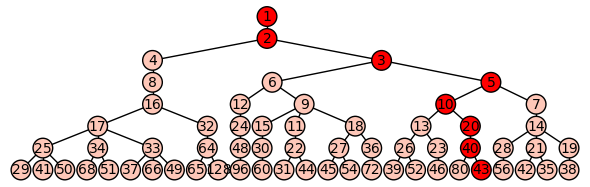

In [13]:
path_in_tree(build_tree(7),43)

Результаты:
1. $n = 10 \Rightarrow 4$ итерации
2. $n = 27 \Rightarrow 6$ итераций
3. $n = 31 \Rightarrow 7$ итераций
4. $n = 43 \Rightarrow 7$ итераций

### Вывод по методу дерева степеней
Метод дерева степеней отработал лучше, чем все рассмотренные перед ним методы, но для его использования необходимо сначала построить само дерево. 

## Выводы

В ходе выполнения практической работы были изучены алгоритмы эффективного вычисления монома, были применены на практике навыки использования SageMath. Реализованные методы:
1. Бинарный метод $SX$.
2. Бинарный метод возведения справа налево.
3. Метод множителей.
4. Метод дерева степеней.

Все эти методы были реализованы программно или высчитаны вручную, а затем сравнены.